In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
from datetime import timedelta as tdel
from matplotlib.dates import DateFormatter
import pathlib

In [3]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['svg.fonttype'] = 'none'
# rc('text', usetex=True)

In [4]:
outdir = "output"

## DFT Demo

In [5]:
miles = np.array([[203442, 199261, 232490, 227698, 242501, 242963, 245140, 247832,
        227899, 236491, 222819, 218390],
       [209685, 200876, 232587, 232513, 245357, 243498, 250363, 253274,
        226312, 241050, 230511, 229584],
       [215215, 208237, 236070, 237226, 251746, 247868, 256392, 258666,
        233625, 245556, 230648, 234260],
       [218534, 203677, 236679, 239415, 253244, 252145, 262105, 260687,
        237451, 254048, 233698, 238538],
       [222450, 213709, 251403, 250968, 257235, 257383, 265969, 262836,
        243515, 254496, 239796, 245029],
       [224072, 219970, 253182, 250860, 262678, 263816, 267025, 265323,
        242240, 251419, 243056, 245787],
       [233302, 220730, 256645, 250665, 263393, 263805, 263442, 265229,
        245624, 257961, 245367, 248208],
       [233799, 219221, 259740, 252734, 267646, 265475, 267179, 271401,
        246050, 261505, 245928, 240444],
       [233469, 221728, 252773, 252699, 261890, 256152, 262152, 261228,
        238701, 256402, 237009, 242326],
       [224840, 218031, 247433, 251481, 258793, 258487, 265026, 260838,
        242034, 252683, 237342, 239774],
       [220177, 210968, 251858, 254014, 257401, 260159, 265861, 264358,
        244712, 256867, 239656, 240932],
       [222724, 213547, 250410, 249309, 254145, 258025, 260317, 260623,
        241764, 252058, 238278, 244615],
       [226834, 218714, 253785, 249567, 261355, 260534, 260880, 264983,
        239001, 254170, 240734, 238876],
       [228607, 216306, 250496, 252116, 263923, 260023, 264570, 268609,
        242582, 259281, 240146, 241365],
       [226444, 215166, 252089, 257947, 268075, 264868, 272335, 271018,
        249125, 267185, 242816, 253618]])

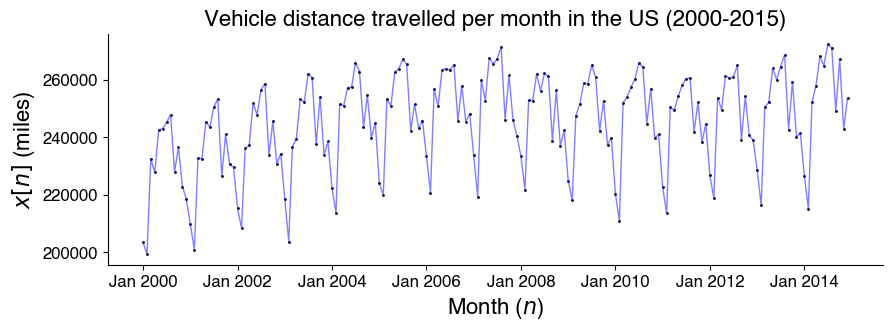

In [6]:
# Miles data
allmiles = miles.reshape(-1)
time = [dt(day=1, month=m, year=y)
        for y in np.arange(2000, 2015, 1)
        for m in np.arange(1, 13, 1)]

fig = plt.figure(figsize=(10, 3))
ax = fig.add_subplot(111)
ax.plot(time, allmiles, '.', color='black', markersize=2)
ax.plot(time, allmiles, color='blue', lw=1, alpha=0.5)
# ax.set_xlim(1, len(allmiles))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.set_xlabel("Month ($n$)", fontsize=16)
ax.set_ylabel("$x[n]$ (miles)", fontsize=16)
date_form = DateFormatter("%b %Y")
ax.xaxis.set_major_formatter(date_form)
ax.tick_params(axis='both', labelsize=12)
ax.set_title("Vehicle distance travelled per month in the US (2000-2015)", fontsize=16);

# Save figure
fig.savefig(pathlib.Path(outdir, "miles.png"), bbox_inches='tight', dpi=300)
fig.savefig(pathlib.Path(outdir, "miles.svg"), bbox_inches='tight')

In [7]:
# Compute the FFT of the data
miles_fft = np.fft.fft(allmiles)
freq = np.arange(0, 1, 1.0 / len(allmiles))

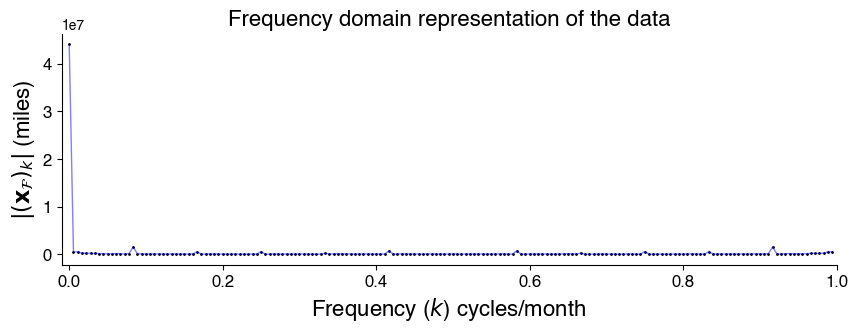

In [8]:
# Miles data
fig = plt.figure(figsize=(10, 3))
ax = fig.add_subplot(111)
ax.plot(freq, np.abs(miles_fft), '.', color='black', markersize=2)
ax.plot(freq, np.abs(miles_fft), color='blue', lw=1, alpha=0.5)
ax.set_xlim(-0.01, 1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.set_xlabel("Frequency ($k$) cycles/month", fontsize=16)
ax.set_ylabel("$| (\mathbf{x}_\mathcal{F})_k |$ (miles)", fontsize=16)
ax.tick_params(axis='both', labelsize=12)
ax.set_title("Frequency domain representation of the data", fontsize=16);

# Save figure
fig.savefig(pathlib.Path(outdir, "miles_fft.png"), bbox_inches='tight', dpi=300)
fig.savefig(pathlib.Path(outdir, "miles_fft.svg"), bbox_inches='tight')

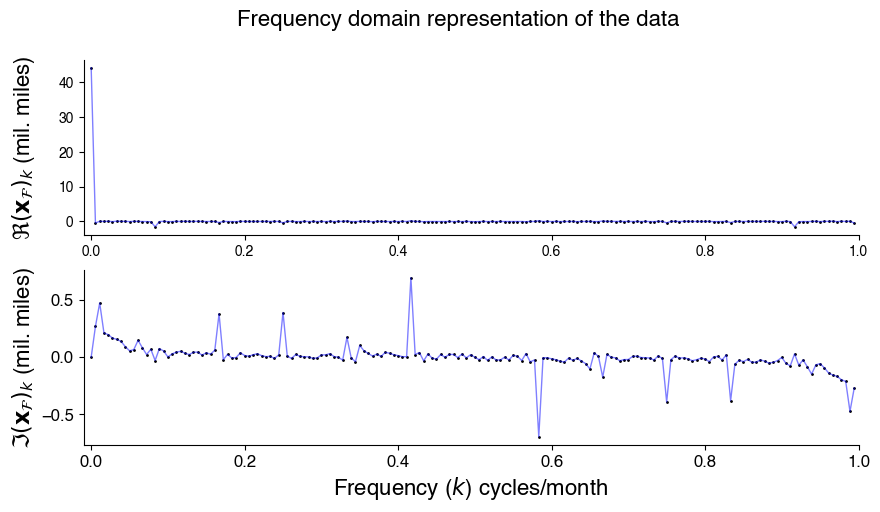

In [9]:
# Miles data
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(211)
ax.plot(freq, np.real(miles_fft) / 1e6, '.', color='black', markersize=2)
ax.plot(freq, np.real(miles_fft) / 1e6, color='blue', lw=1, alpha=0.5)
ax.set_xlim(-0.01, 1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.set_ylabel("$\Re (\mathbf{x}_\mathcal{F})_k$ (mil. miles)", fontsize=16)
ax.yaxis.set_label_coords(-0.06, 0.5)
ax = fig.add_subplot(212)
ax.plot(freq, np.imag(miles_fft) / 1e6, '.', color='black', markersize=2)
ax.plot(freq, np.imag(miles_fft) / 1e6, color='blue', lw=1, alpha=0.5)
ax.set_xlim(-0.01, 1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.set_xlabel("Frequency ($k$) cycles/month", fontsize=16)
ax.set_ylabel("$\Im (\mathbf{x}_\mathcal{F})_k$ (mil. miles)", fontsize=16)
ax.yaxis.set_label_coords(-0.06, 0.5)
ax.tick_params(axis='both', labelsize=12)
plt.suptitle("Frequency domain representation of the data", fontsize=16);


# Save figure
fig.savefig(pathlib.Path(outdir, "miles_fft_reim.png"), bbox_inches='tight', dpi=300)
fig.savefig(pathlib.Path(outdir, "miles_fft_reim.svg"), bbox_inches='tight')

In [10]:
# Let's remove the DC component as we are not interested in the time varying 
# component.
allmiles_new = allmiles - np.mean(allmiles)

# Compute the FFT of the data
miles_new_fft = np.fft.fft(allmiles_new)

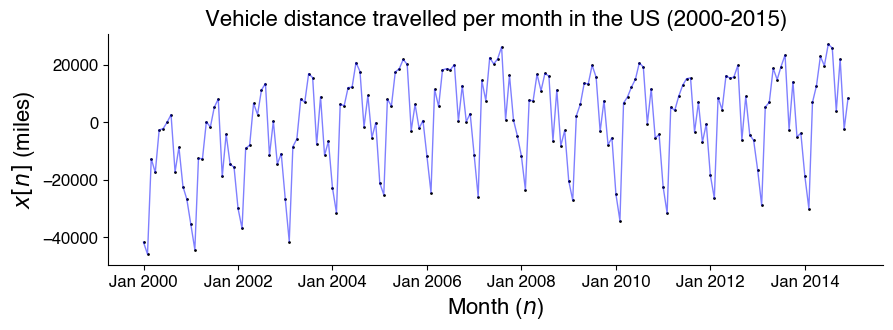

In [11]:
# Miles data
allmiles = miles.reshape(-1)
time = [dt(day=1, month=m, year=y)
        for y in np.arange(2000, 2015, 1)
        for m in np.arange(1, 13, 1)]

fig = plt.figure(figsize=(10, 3))
ax = fig.add_subplot(111)
ax.plot(time, allmiles_new, '.', color='black', markersize=2)
ax.plot(time, allmiles_new, color='blue', lw=1, alpha=0.5)
# ax.set_xlim(1, len(allmiles))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.set_xlabel("Month ($n$)", fontsize=16)
ax.set_ylabel("$x[n]$ (miles)", fontsize=16)
date_form = DateFormatter("%b %Y")
ax.xaxis.set_major_formatter(date_form)
ax.tick_params(axis='both', labelsize=12)
ax.set_title("Vehicle distance travelled per month in the US (2000-2015)", fontsize=16);

# Save figure
fig.savefig(pathlib.Path(outdir, "miles_nomean.png"), bbox_inches='tight', dpi=300)
fig.savefig(pathlib.Path(outdir, "miles_nomean.svg"), bbox_inches='tight')

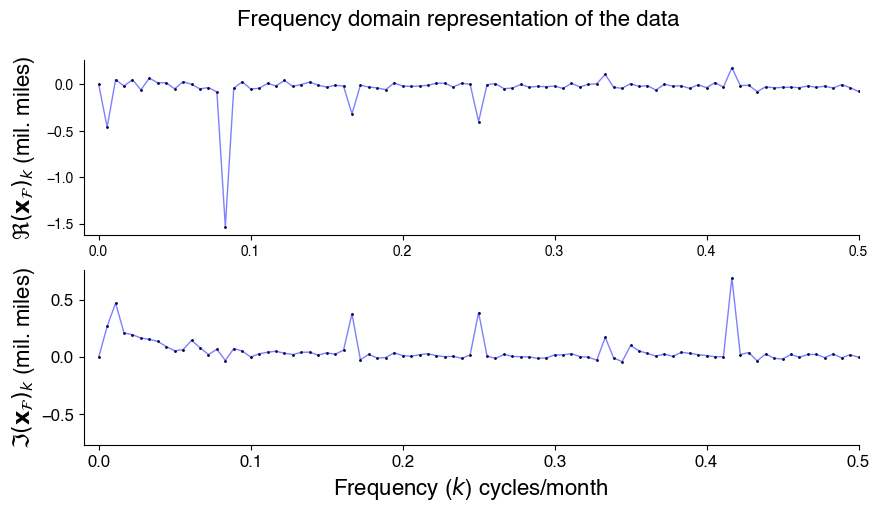

In [12]:
# Miles data
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(211)
ax.plot(freq, np.real(miles_new_fft) / 1e6, '.', color='black', markersize=2)
ax.plot(freq, np.real(miles_new_fft) / 1e6, color='blue', lw=1, alpha=0.5)
ax.set_xlim(-0.01, 0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.set_ylabel("$\Re (\mathbf{x}_\mathcal{F})_k$ (mil. miles)", fontsize=16)
ax.yaxis.set_label_coords(-0.06, 0.5)
ax = fig.add_subplot(212)
ax.plot(freq, np.imag(miles_new_fft) / 1e6, '.', color='black', markersize=2)
ax.plot(freq, np.imag(miles_new_fft) / 1e6, color='blue', lw=1, alpha=0.5)
ax.set_xlim(-0.01, 0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.set_xlabel("Frequency ($k$) cycles/month", fontsize=16)
ax.set_ylabel("$\Im (\mathbf{x}_\mathcal{F})_k$ (mil. miles)", fontsize=16)
ax.yaxis.set_label_coords(-0.06, 0.5)
ax.tick_params(axis='both', labelsize=12)
plt.suptitle("Frequency domain representation of the data", fontsize=16);


# Save figure
fig.savefig(pathlib.Path(outdir, "miles_nomean_fft_reim.png"), bbox_inches='tight', dpi=300)
fig.savefig(pathlib.Path(outdir, "miles_nomean_fft_reim.svg"), bbox_inches='tight')

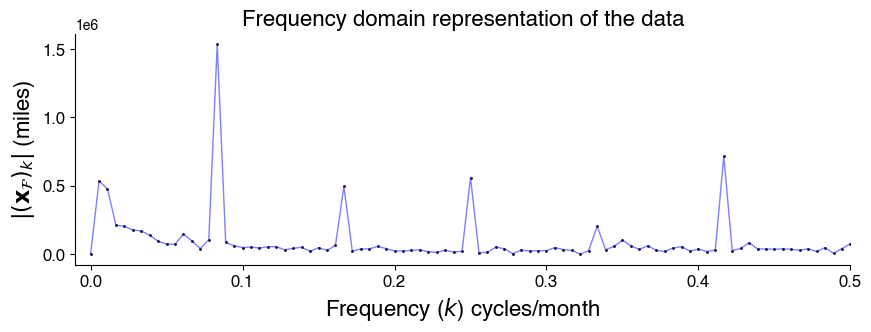

In [13]:
# Miles data
fig = plt.figure(figsize=(10, 3))
ax = fig.add_subplot(111)
ax.plot(freq, np.abs(miles_new_fft), '.', color='black', markersize=2)
ax.plot(freq, np.abs(miles_new_fft), color='blue', lw=1, alpha=0.5)
ax.set_xlim(-0.01, 0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.set_xlabel("Frequency ($k$) cycles/month", fontsize=16)
ax.set_ylabel("$| (\mathbf{x}_\mathcal{F})_k |$ (miles)", fontsize=16)
ax.tick_params(axis='both', labelsize=12)
ax.set_title("Frequency domain representation of the data", fontsize=16);


# Save figure
fig.savefig(pathlib.Path(outdir, "miles_nomean_fft.png"), bbox_inches='tight', dpi=300)
fig.savefig(pathlib.Path(outdir, "miles_nomean_fft.svg"), bbox_inches='tight')

## Transient signals and their representaiton

In [7]:
import pywt

In [103]:
np.random.seed(0)
N = 128
n = np.arange(0, N)
# Signal 1
x1 = np.zeros(N)
x1[64:72] = 0.5
x1[72:80] = -0.5
x1 += np.random.randn(N) * 0.1
# Signal 2
x2 = np.zeros(N)
x2[16:24] = -0.5
x2[24:32] = 0.5
x2 += np.random.randn(N) * 0.1

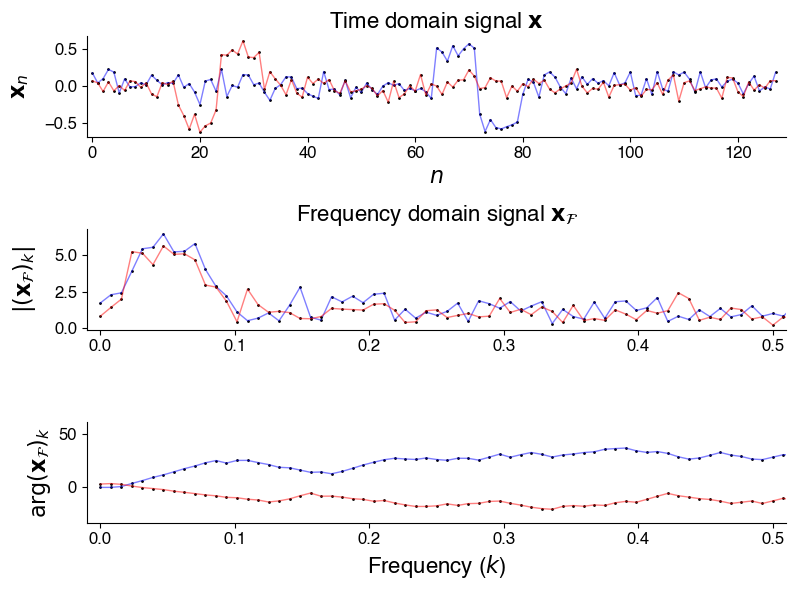

In [110]:
# Plot of the transient signal nad its FFT
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(311)
ax.plot(n, x1, '.', color='black', markersize=2)
ax.plot(n, x1, color='blue', lw=1, alpha=0.5)
ax.plot(n, x2, '.', color='black', markersize=2)
ax.plot(n, x2, color='red', lw=1, alpha=0.5)
ax.set_xlim(-1, N+1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.set_xlabel("$n$", fontsize=16)
ax.set_ylabel("$\mathbf{x}_n$", fontsize=16)
ax.yaxis.set_label_coords(-0.08, 0.5)
ax.set_title("Time domain signal $\mathbf{x}$", fontsize=16)
ax.tick_params(axis='both', labelsize=12)
ax = fig.add_subplot(312)
_f, _xf1 = np.arange(0, 1, 1 / N), np.abs(np.fft.fft(x1)), 
_f, _xf2 = np.arange(0, 1, 1 / N), np.abs(np.fft.fft(x2)), 
ax.plot(_f, _xf1, '.', color='black', markersize=2)
ax.plot(_f, _xf1, color='blue', lw=1, alpha=0.5)
ax.plot(_f, _xf2, '.', color='black', markersize=2)
ax.plot(_f, _xf2, color='red', lw=1, alpha=0.5)
ax.set_xlim(-0.01, 0.51)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
# ax.set_xlabel("Frequency ($k$)", fontsize=16)
ax.set_ylabel("$| (\mathbf{x}_\mathcal{F})_k |$", fontsize=16)
ax.yaxis.set_label_coords(-0.07, 0.5)
ax.set_title("Frequency domain signal $\mathbf{x}_{\mathcal{F}}$", fontsize=16)
ax.tick_params(axis='both', labelsize=12)
ax = fig.add_subplot(313)
_f, _xf1 = np.arange(0, 1, 1 / N), np.unwrap(np.angle(np.fft.fft(x1))) 
_f, _xf2 = np.arange(0, 1, 1 / N), np.unwrap(np.angle(np.fft.fft(x2)))
ax.plot(_f, _xf1, '.', color='black', markersize=2)
ax.plot(_f, _xf1, color='blue', lw=1, alpha=0.5)
ax.plot(_f, _xf2, '.', color='black', markersize=2)
ax.plot(_f, _xf2, color='red', lw=1, alpha=0.5)
ax.set_xlim(-0.01, 0.51)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.set_xlabel("Frequency ($k$)", fontsize=16)
ax.set_ylabel("$\\arg (\mathbf{x}_\mathcal{F})_k$", fontsize=16)
ax.tick_params(axis='both', labelsize=12)
plt.tight_layout()

# Save figure
fig.savefig(pathlib.Path(outdir, "signal_transient.png"), bbox_inches='tight', dpi=300)
fig.savefig(pathlib.Path(outdir, "signal_transient.svg"), bbox_inches='tight')

In [105]:
wtcoeff1 = pywt.wavedec(x1, 'haar', mode='symmetric')
wtcoeff2 = pywt.wavedec(x2, 'haar', mode='symmetric')

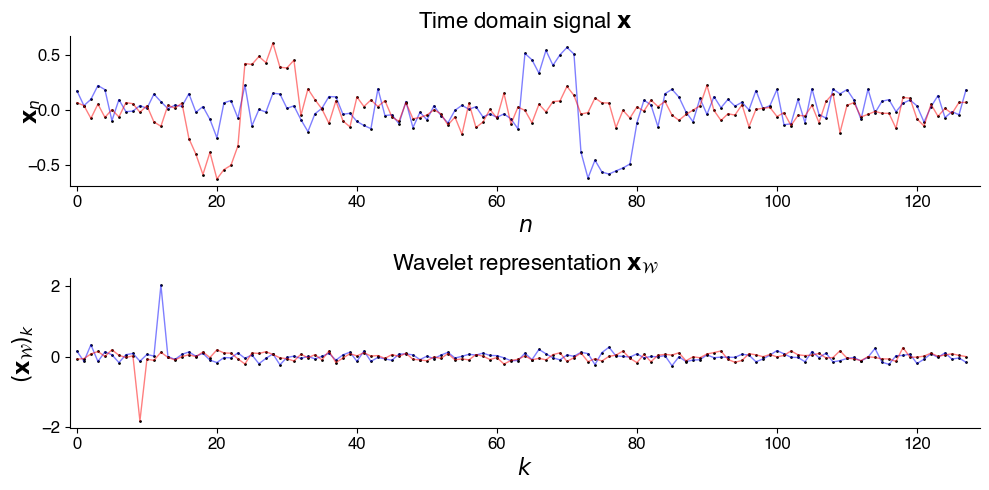

In [109]:
# Plot of the transient signal nad its FFT
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(211)
ax.plot(n, x1, '.', color='black', markersize=2)
ax.plot(n, x1, color='blue', lw=1, alpha=0.5)
ax.plot(n, x2, '.', color='black', markersize=2)
ax.plot(n, x2, color='red', lw=1, alpha=0.5)
ax.set_xlim(-1, N+1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.set_xlabel("$n$", fontsize=16)
ax.set_ylabel("$\mathbf{x}_n$", fontsize=16)
ax.yaxis.set_label_coords(-0.03, 0.5)
ax.set_title("Time domain signal $\mathbf{x}$", fontsize=16)
ax.tick_params(axis='both', labelsize=12)
ax = fig.add_subplot(212)
ax.plot(n, np.hstack(wtcoeff1), '.', color='black', markersize=2)
ax.plot(n, np.hstack(wtcoeff1), color='blue', lw=1, alpha=0.5)
ax.plot(n, np.hstack(wtcoeff2), '.', color='black', markersize=2)
ax.plot(n, np.hstack(wtcoeff2), color='red', lw=1, alpha=0.5)
ax.set_xlim(-1, N+1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.set_xlabel("$k$", fontsize=16)
ax.set_ylabel("$(\mathbf{x}_\mathcal{W})_k$", fontsize=16)
ax.set_title("Wavelet representation $\mathbf{x}_{\mathcal{W}}$", fontsize=16)
ax.tick_params(axis='both', labelsize=12)
plt.tight_layout()

# Save figure
fig.savefig(pathlib.Path(outdir, "signal_transient_wavedec.png"), bbox_inches='tight', dpi=300)
fig.savefig(pathlib.Path(outdir, "signal_transient_wavedec.svg"), bbox_inches='tight')

## Wavelet basis

In [179]:
def get_wtcoeff_loc(N, inx):
    steps = int(np.log2(N))
    for s in range(steps):
        a, b = inx // (N // 2**(s+1)), inx % (N // 2**(s+1))
        if a == 1:
            break
    return steps - s if a == 1 else 0, b,

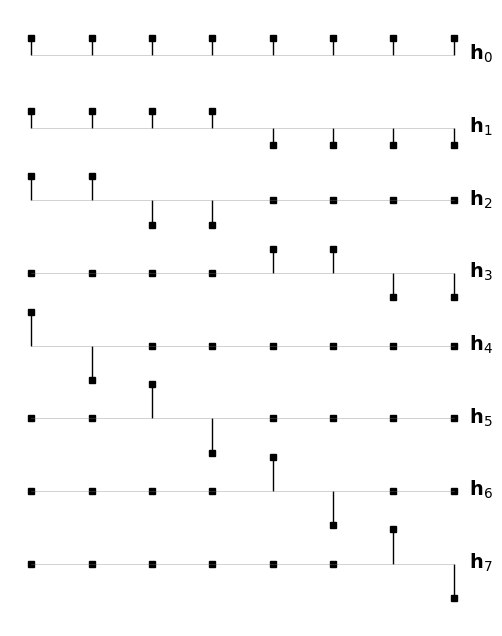

In [223]:
N = 8

fig = plt.figure(figsize=(6, 8))
ax = fig.add_subplot(111)
for i in range(0, N):
    a, b = get_wtcoeff_loc(N, i)
    wtcoeff = [np.array([0]), np.array([0]), np.array([0, 0]), np.array([0, 0, 0, 0])]
    wtcoeff[a][b] = 1
    markerline, stemlines, baseline = ax.stem(np.arange(N),
                                              pywt.waverec(wtcoeff, 'haar', mode='symmetric') - 1.5 * i,
                                              bottom=-1.5 * i,
                                              markerfmt='s', linefmt='black')
    plt.setp(baseline, color='grey', linewidth=0.5, alpha=0.5)
    plt.setp(stemlines, linewidth = 1.0)
    plt.setp(markerline, markersize = 4)
    plt.text(7.25, -1.5 * i - 0.1, f"$\mathbf{{h}}_{i}$", fontsize=14)
    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])


# Save figure
fig.savefig(pathlib.Path(outdir, "haar_vectors.png"), bbox_inches='tight', dpi=300)
fig.savefig(pathlib.Path(outdir, "haar_vectors.svg"), bbox_inches='tight')

In [237]:
np.random.seed(0)
N = 128
n = np.arange(0, N)
# Signal 1
x1 = np.zeros(N)
x1[50:70] = 1
x1 = x1 * np.sin(2 * np.pi * 0.05 * (n - 50))
x1 += np.random.randn(N) * 0.01

wtcoeff1 = pywt.wavedec(x1, 'haar', mode='symmetric')

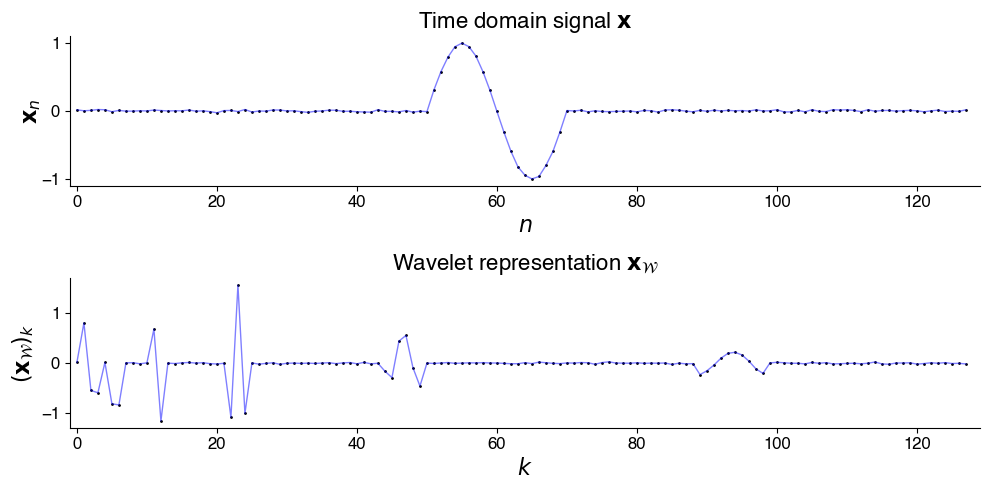

In [240]:
# Plot of the transient signal nad its FFT
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(211)
ax.plot(n, x1, '.', color='black', markersize=2)
ax.plot(n, x1, color='blue', lw=1, alpha=0.5)
# ax.plot(n, x2, '.', color='black', markersize=2)
# ax.plot(n, x2, color='red', lw=1, alpha=0.5)
ax.set_xlim(-1, N+1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.set_xlabel("$n$", fontsize=16)
ax.set_ylabel("$\mathbf{x}_n$", fontsize=16)
ax.yaxis.set_label_coords(-0.03, 0.5)
ax.set_title("Time domain signal $\mathbf{x}$", fontsize=16)
ax.tick_params(axis='both', labelsize=12)
ax = fig.add_subplot(212)
ax.plot(n, np.hstack(wtcoeff1), '.', color='black', markersize=2)
ax.plot(n, np.hstack(wtcoeff1), color='blue', lw=1, alpha=0.5)
# ax.plot(n, np.hstack(wtcoeff2), '.', color='black', markersize=2)
# ax.plot(n, np.hstack(wtcoeff2), color='red', lw=1, alpha=0.5)
ax.set_xlim(-1, N+1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.set_xlabel("$k$", fontsize=16)
ax.set_ylabel("$(\mathbf{x}_\mathcal{W})_k$", fontsize=16)
ax.set_title("Wavelet representation $\mathbf{x}_{\mathcal{W}}$", fontsize=16)
ax.tick_params(axis='both', labelsize=12)
plt.tight_layout()

# Save figure
fig.savefig(pathlib.Path(outdir, "sine_transient_wavedec.png"), bbox_inches='tight', dpi=300)
fig.savefig(pathlib.Path(outdir, "sine_transient_wavedec.svg"), bbox_inches='tight')

## Wavelet decomposition for demo

In [6]:
import pywt

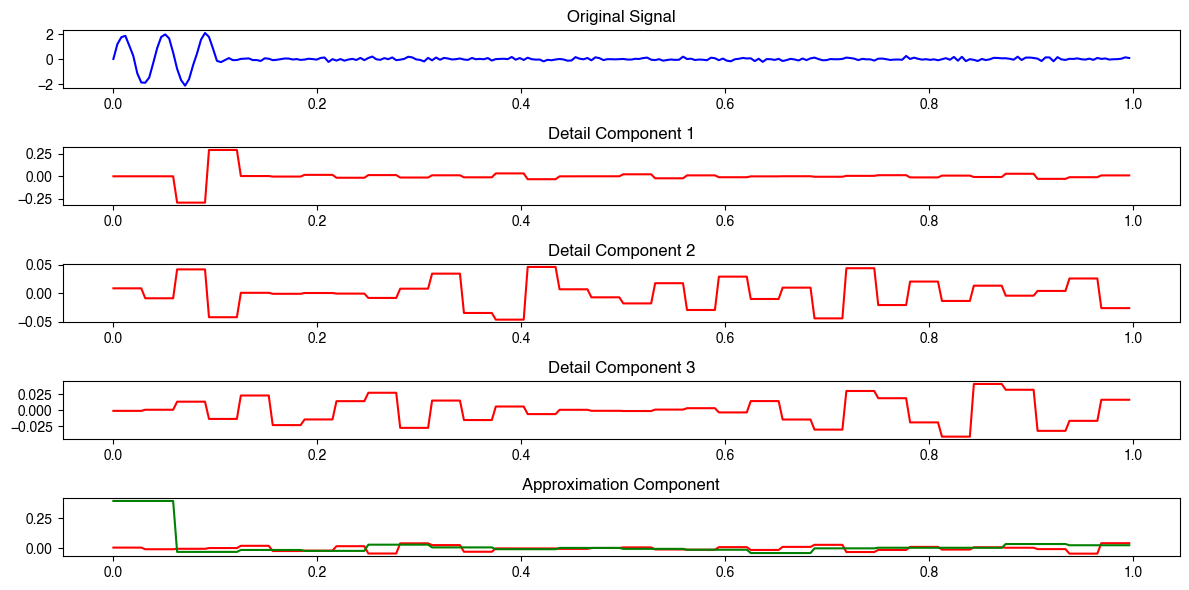

In [15]:
# Create a noisy sinusoidal pulse signal
t = np.linspace(0, 1, num=256, endpoint=False)
signal = 2 * np.sin(10 * 5 * np.pi * t) * (t <= 0.1) + 0.2 * np.random.normal(0, 0.5, len(t))

# Perform Haar wavelet decomposition
wavelet = 'haar'
coeffs = pywt.wavedec(signal, wavelet, level=4)

# Reconstruct the approximation and detail components
approximation = pywt.upcoef('a', coeffs[0], wavelet, level=4, take=len(signal))
details = [pywt.upcoef('d', coeffs[i], wavelet, level=4, take=len(signal)) for i in range(1, 5)]

# Plot the original signal and the Haar wavelet components
plt.figure(figsize=(12, 6))

# Original Signal
plt.subplot(5, 1, 1)
plt.plot(t, signal, 'b')
plt.title('Original Signal')

# Approximation Components
for i in range(4):
    plt.subplot(5, 1, i + 2)
    plt.plot(t, details[i], 'r')
    plt.title(f'Detail Component {i+1}')

# Approximation Component
plt.subplot(5, 1, 5)
plt.plot(t, approximation, 'g')
plt.title('Approximation Component')

plt.tight_layout()

## Signal processing example

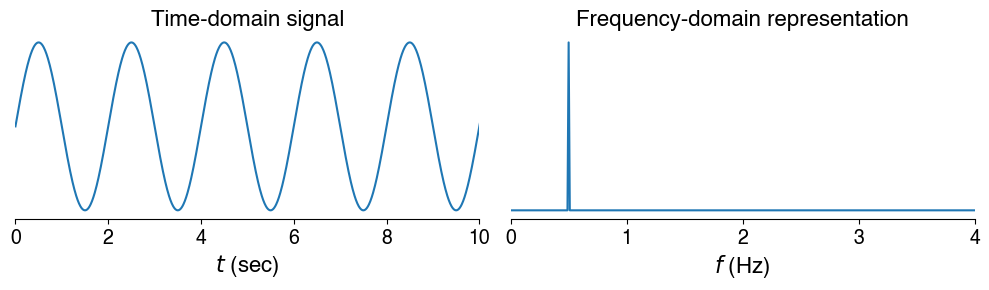

In [7]:
dt = 0.01
t = np.arange(0, 100, dt)
x1 = np.sin(2 * np.pi * 0.5 * t)
x2 = np.sin(2 * np.pi * 0.05 * t) + 0.2 * np.sin(2 * np.pi * 0.5 * t) + 0.5 * np.sin(2 * np.pi * 0.25 * t) + 0.4 * np.sin(2 * np.pi * 3.5 * t)

# Grid of plots
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(221)
ax.plot(t, x1)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks([])  # Hide ticks on the left side
ax.yaxis.set_label_coords(1.02, 0.5)  # Move the y-axis label to the right
ax.set_xlabel("$t$ (sec)", fontsize=16)
ax.tick_params(axis='both', labelsize=14)
ax.set_xlim(0, 10)
ax.set_title("Time-domain signal", fontsize=16)

ax = fig.add_subplot(222)
ax.plot(np.arange(0, 1 / dt, 1 / (dt * len(t))),
        np.abs(np.fft.fft(x1)))
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks([])  # Hide ticks on the left side
ax.yaxis.set_label_coords(1.02, 0.5)  # Move the y-axis label to the right
ax.set_xlabel("$f$ (Hz)", fontsize=16)
ax.tick_params(axis='both', labelsize=14)
ax.set_xlim(0, 4)
ax.set_title("Frequency-domain representation", fontsize=16)

plt.tight_layout()

# Save figure
fig.savefig(pathlib.Path(outdir, "signal1_fft.png"), bbox_inches='tight', dpi=300)
fig.savefig(pathlib.Path(outdir, "signal1_fft.svg"), bbox_inches='tight')

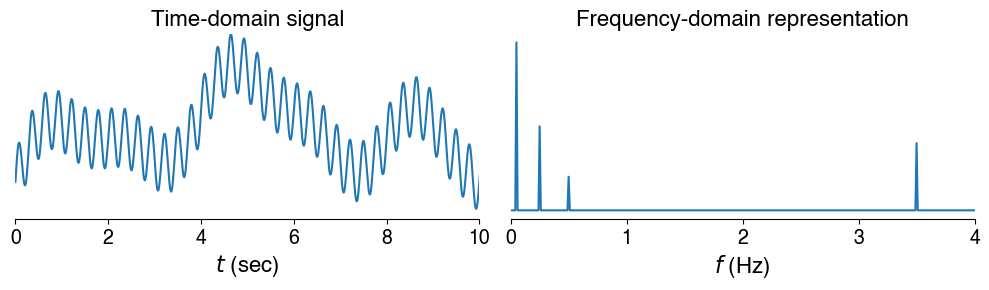

In [9]:
dt = 0.01
t = np.arange(0, 100, dt)
x1 = np.sin(2 * np.pi * 0.5 * t)
x2 = np.sin(2 * np.pi * 0.05 * t) + 0.2 * np.sin(2 * np.pi * 0.5 * t) + 0.5 * np.sin(2 * np.pi * 0.25 * t) + 0.4 * np.sin(2 * np.pi * 3.5 * t)

# Grid of plots
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(221)
ax.plot(t, x2)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks([])  # Hide ticks on the left side
ax.yaxis.set_label_coords(1.02, 0.5)  # Move the y-axis label to the right
ax.set_xlabel("$t$ (sec)", fontsize=16)
ax.tick_params(axis='both', labelsize=14)
ax.set_xlim(0, 10)
ax.set_ylim(-0.5, 2)
ax.set_title("Time-domain signal", fontsize=16)

ax = fig.add_subplot(222)
ax.plot(np.arange(0, 1 / dt, 1 / (dt * len(t))),
        np.abs(np.fft.fft(x2)))
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks([])  # Hide ticks on the left side
ax.yaxis.set_label_coords(1.02, 0.5)  # Move the y-axis label to the right
ax.set_xlabel("$f$ (Hz)", fontsize=16)
ax.tick_params(axis='both', labelsize=14)
ax.set_xlim(0, 4)
ax.set_title("Frequency-domain representation", fontsize=16)

plt.tight_layout()

# Save figure
fig.savefig(pathlib.Path(outdir, "signal2_fft.png"), bbox_inches='tight', dpi=300)
fig.savefig(pathlib.Path(outdir, "signal2_fft.svg"), bbox_inches='tight')